In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [135]:
data = pd.read_csv("properties_2016.csv")
data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [136]:
data.shape

(2985217, 58)

In [137]:
features1 = []
all_features = data.columns
for i in all_features:
    if data[i].isnull().sum() < 500000:                
            features1.append(i)

In the cell above, I am filtering the features in which more than 30% of the records are missing. 

In [138]:
dataNew = data[features1]
dataNew.shape

(2985217, 25)

In [139]:
dataNew.isnull().sum()

parcelid                             0
bathroomcnt                      11462
bedroomcnt                       11450
calculatedbathnbr               128912
calculatedfinishedsquarefeet     55565
finishedsquarefeet12            276033
fips                             11437
fullbathcnt                     128912
latitude                         11437
longitude                        11437
lotsizesquarefeet               276099
propertycountylandusecode        12277
propertylandusetypeid            11437
rawcensustractandblock           11437
regionidcity                     62845
regionidcounty                   11437
regionidzip                      13980
roomcnt                          11475
yearbuilt                        59928
structuretaxvaluedollarcnt       54982
taxvaluedollarcnt                42550
assessmentyear                   11439
landtaxvaluedollarcnt            67733
taxamount                        31250
censustractandblock              75126
dtype: int64

In [140]:
dataFP = dataNew.copy(deep=True)
dataFP.shape

(2985217, 25)

In [141]:
del dataFP['propertycountylandusecode']

I deleted the 'propertycountylandusecode' column becuse its values have alphabets like 'A','B' etc which are hard to process while filling the empty fields for data cleaning.

In [142]:
dataFP.shape

(2985217, 24)

In [143]:
NoEmptyFieldsData = dataFP.fillna(dataFP.mean())
NoEmptyFieldsData.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,2.299263,1827.162124,1760.000608,6037.0,2.244165,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,1964.261641,170883.577166,9.0,2015.0,9.0,5377.607139,6.048431e+13
1,10759547,0.0,0.0,2.299263,1827.162124,1760.000608,6037.0,2.244165,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,1964.261641,170883.577166,27516.0,2015.0,27516.0,5377.607139,6.048431e+13
2,10843547,0.0,0.0,2.299263,73026.000000,1760.000608,6037.0,2.244165,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1964.261641,650756.000000,1413387.0,2015.0,762631.0,20800.370000,6.048431e+13
3,10859147,0.0,0.0,2.299263,5068.000000,1760.000608,6037.0,2.244165,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.000000,571346.000000,1156834.0,2015.0,585488.0,14557.570000,6.048431e+13
4,10879947,0.0,0.0,2.299263,1776.000000,1760.000608,6037.0,2.244165,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.000000,193796.000000,433491.0,2015.0,239695.0,5725.170000,6.048431e+13


Above, filling the NAN values in the data with the corresponding mean values.

In [144]:
trainData = pd.read_csv("train_2016_v2.csv")
trainData.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [145]:
trainData.shape

(90275, 3)

In [146]:
mergeWithTrainData = pd.merge(trainData,NoEmptyFieldsData,on='parcelid')
mergeWithTrainData.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,2.0,3.0,2.0,1684.0,1684.0,6037.0,2.0,...,3101.0,96370.0,0.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,3.5,4.0,3.5,2263.0,2263.0,6059.0,3.0,...,1286.0,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,6.048431e+13
2,12098116,-0.0040,2016-01-01,3.0,2.0,3.0,2217.0,2217.0,6037.0,3.0,...,3101.0,96293.0,0.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,2.0,2.0,2.0,839.0,839.0,6037.0,2.0,...,3101.0,96222.0,0.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,2.5,4.0,2.5,2283.0,2283.0,6059.0,2.0,...,1286.0,96961.0,8.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [147]:
mergeWithTrainData.shape

(90275, 26)

In [148]:
del mergeWithTrainData['parcelid']

Deleted this field because 'parcelId' is not a feature and therefore will not contribute anything towards training the data. 

PLOTTING THE HEAT MAP

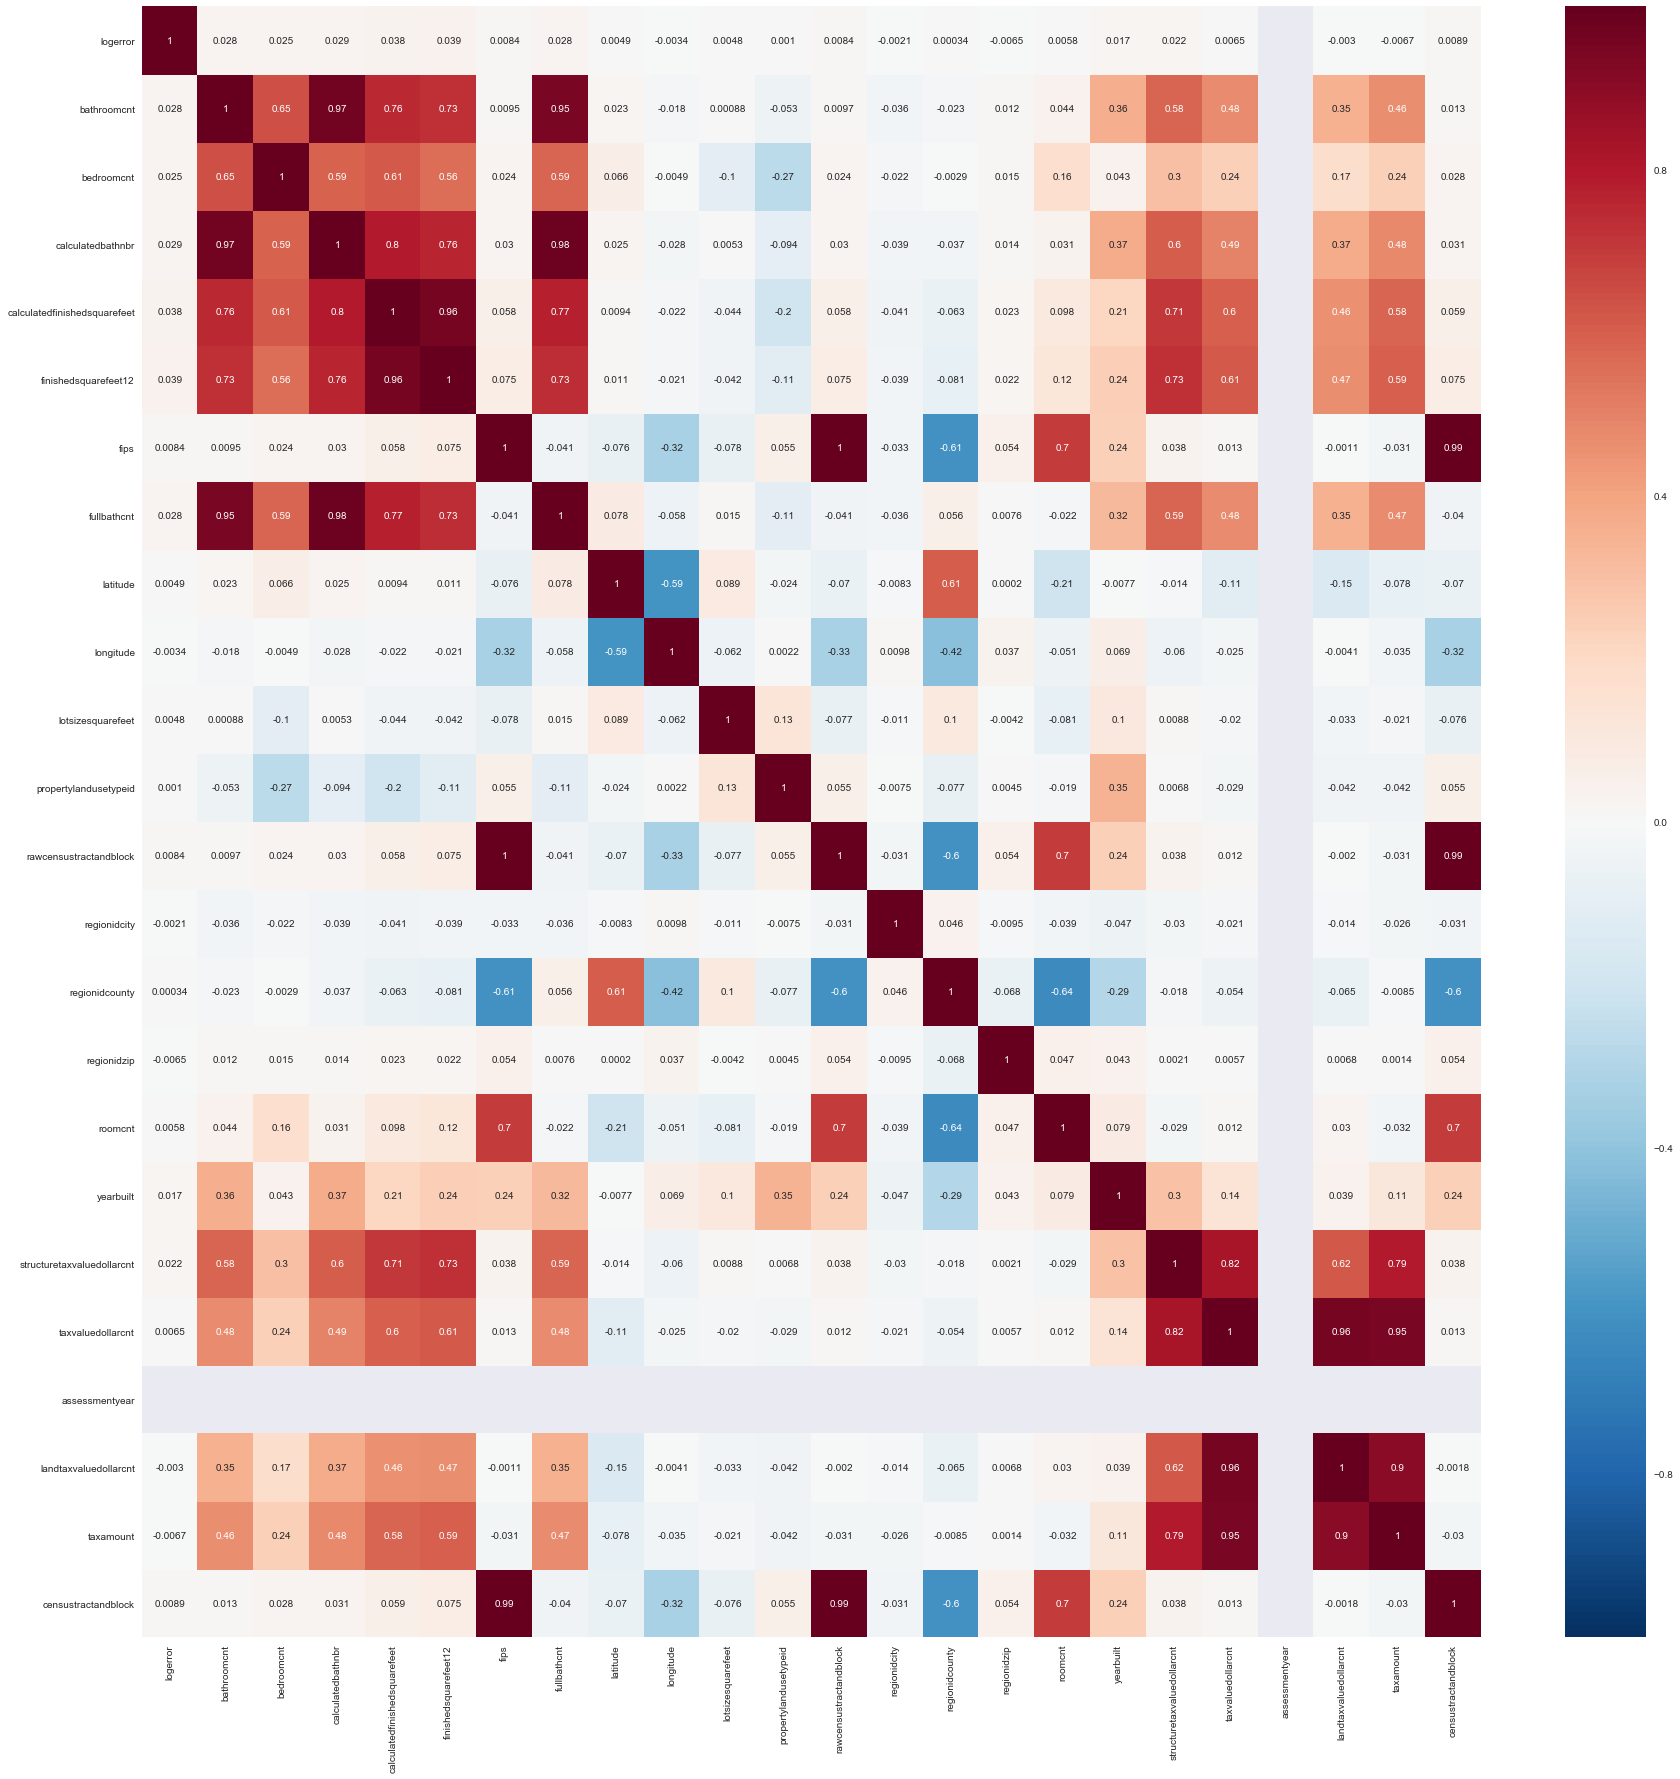

In [149]:
corr= mergeWithTrainData.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True)
plt.show()

From the heat map we find that 'rawcensustractandblock' and 'fips' have the most positive correlation (1) and 'regionidcounty' and 'roomcnt' have the most negative relationship (-0.64)

PLOTTING THE HISTOGRAM [1]

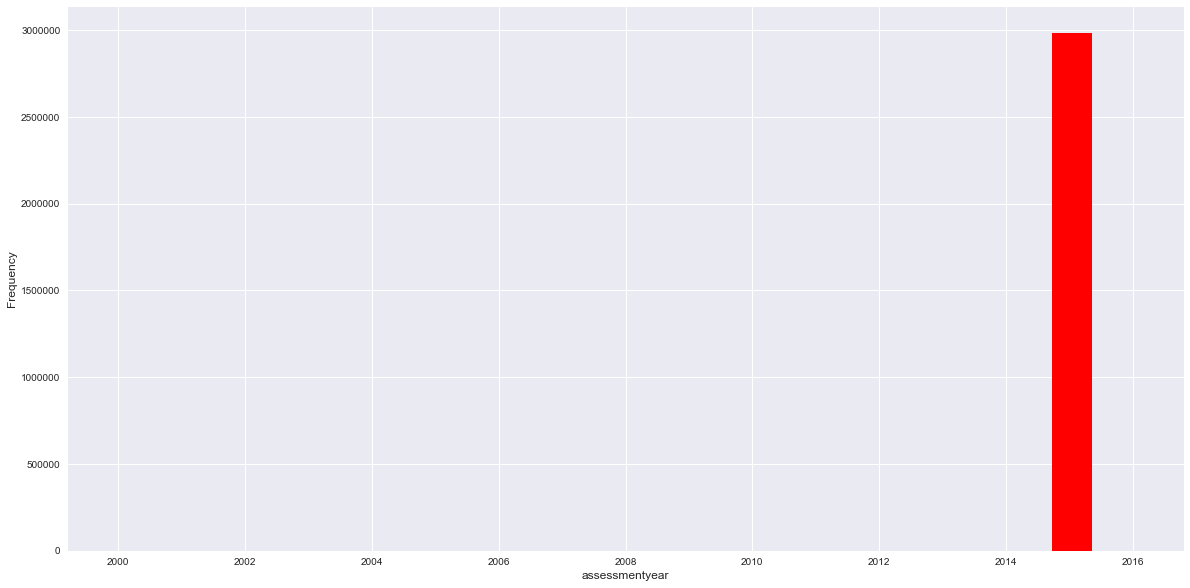

In [150]:
ax = NoEmptyFieldsData['assessmentyear'].plot.hist( color = 'r' , figsize=(20,10), bins = 25)
ax.set_xlabel('assessmentyear',fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
plt.show()

Here, I have plotted a histogram for 'assessmentyear' column that I selected from the properties dataset. A histogram is used to show frequency distributions. A frequency distribution shows how often each different value in a set of data occurs. If we look at the frequency distribution for 'assessmentyear' above, we see that it shows one straight bar. This means that the value of this field is more or less the same in the entire data set because the bar is standing on one value and no other value shows up in the frquency distribution. From this we can infer that probably this field would not help while training our model and predicting our values so we can drop this field from our final dataset before training our model.

PLOTTING THE SCATTER PLOT [2]

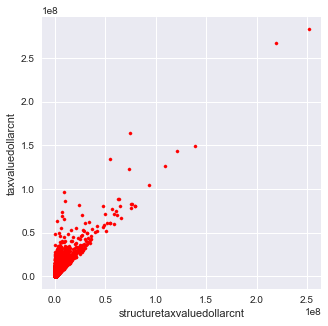

In [185]:
ax1 = NoEmptyFieldsData.plot.scatter(x='structuretaxvaluedollarcnt', y='taxvaluedollarcnt', color = 'r' , figsize=(5,5), s=10)

The scatter plot graph of 'structuretaxvaluedollarcnt' and 'taxvaluedollarcnt' above shows a somewhat positive linear relationship between these two features. Therefore,  one can infer that they will have the same effect on the model and so we can remove one of them from our final dataset as a part of the data cleaning process.

PLOTTING THE SCATTER PLOT [3]

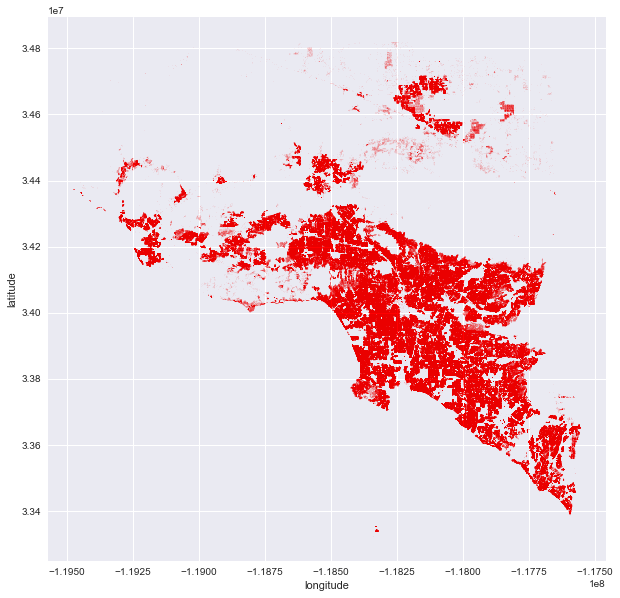

In [152]:
ax1 = NoEmptyFieldsData.plot.scatter(x='longitude', y='latitude', color = 'r' , figsize=(10,10), alpha=0.1, s=0.1)

The above scatter plot shows us the location of the houses in our dataset in terms of their latitute and longitude.  This plot gives us more context about the geographic location of the data which can have a huge impact on the sale price of the houses.

In the cell below I'm calculating the mean of the values of logerror for each transaction date

In [189]:
forLineChart = mergeWithTrainData.groupby('transactiondate', as_index=False)['logerror'].mean()
forLineChart.head()

,transactiondate,logerror
0,2016-01-01,-0.048267
1,2016-01-02,-0.008150
2,2016-01-03,0.007736
3,2016-01-04,0.002742
4,2016-01-05,0.014271


In the cell below I have extracted the month number from the transaction date

In [188]:
forLineChart['transactiondate'] = pd.to_datetime(forLineChart['transactiondate'])
forLineChart['month'] = forLineChart['transactiondate'].dt.month
forLineChart.head()

,transactiondate,logerror,month
0,2016-01-01,-0.048267,1
1,2016-01-02,-0.008150,1
2,2016-01-03,0.007736,1
3,2016-01-04,0.002742,1
4,2016-01-05,0.014271,1


In the cell below I am calculating the mean of the values of logerror for each month in a year

In [155]:
forLineChart = forLineChart.groupby('month', as_index=False)['logerror'].mean()
forLineChart

,month,logerror
0,1,0.013790
1,2,0.010367
2,3,0.006879
3,4,0.003782
4,5,0.006975
5,6,0.010507
6,7,0.005120
7,8,0.013191
8,9,0.015078
9,10,0.011840


PLOTTING THE LINE CHART [4]

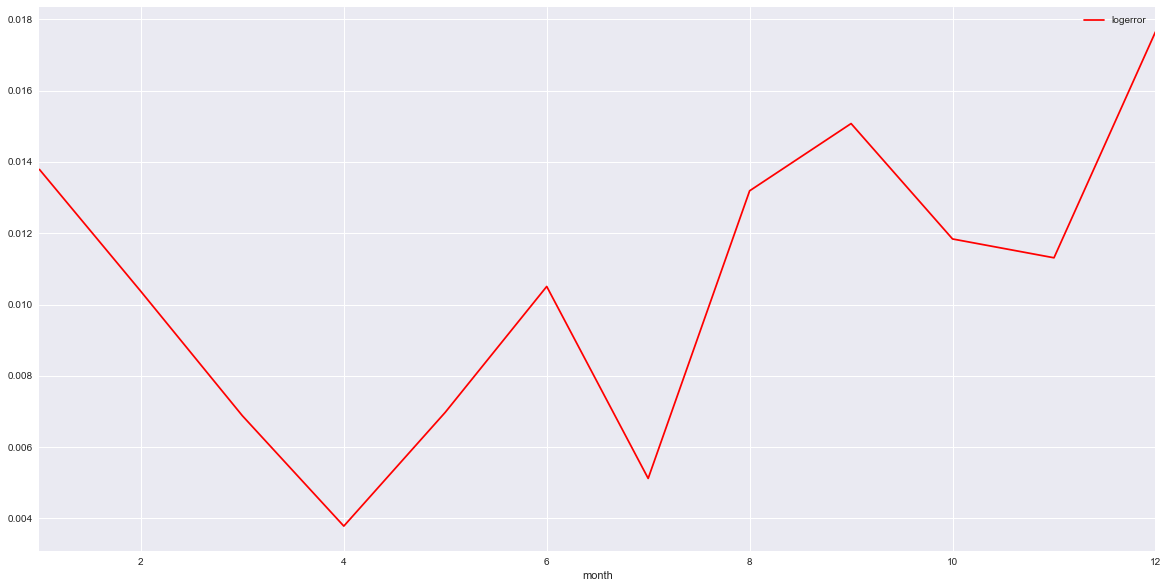

In [156]:
ax1 = forLineChart.plot.line(x='month', y='logerror', color = 'r' , figsize=(20,10))

Line graphs can be used to compare changes over the same period of time for more than one group. Here, I have plotted a line chart for logerror values for each month in a year. From this plot we can see that in the months of December and January the mean error is the highest whereas for months like April and July the Zillow prediction was very close to the actual result.

PLOTTING THE LINE CHART [5]

In [177]:
forlinechart2 = mergeWithTrainData.groupby('roomcnt', as_index=False)['logerror'].mean()
forlinechart2.head()

,roomcnt,logerror
0,0.0,0.011182
1,1.0,0.022133
2,2.0,-0.062060
3,3.0,0.033146
4,4.0,0.005273


Above, I have calculated the mean of 'logerror' values for each value of 'roomcnt' for a better analysis of data

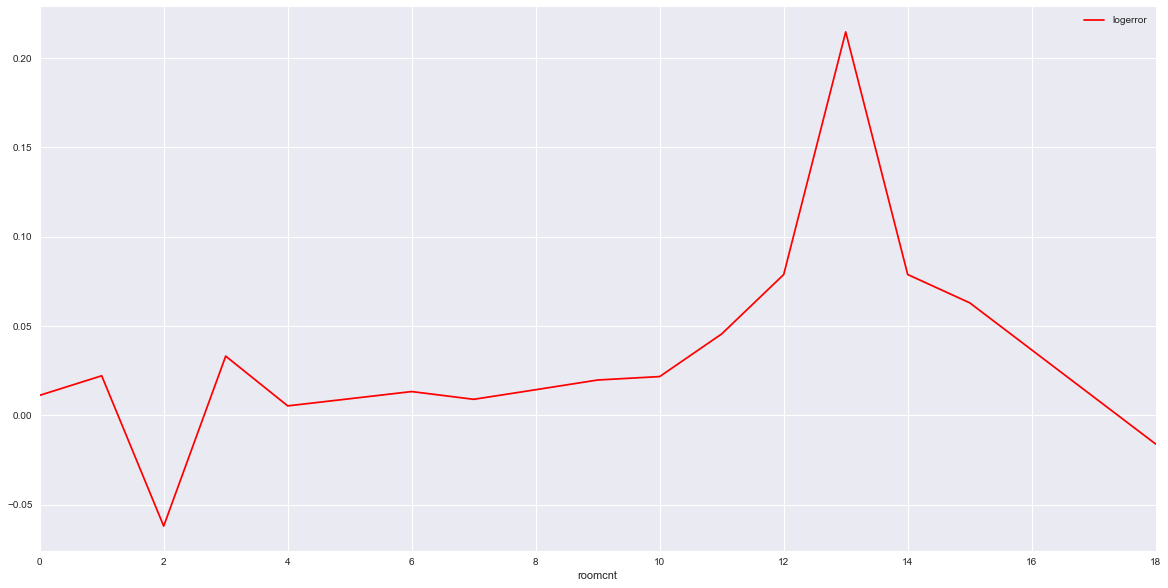

In [178]:
ax1 = forlinechart2.plot.line(x='roomcnt', y='logerror', color = 'r' , figsize=(20,10))

The line chart above shows us that the log error values plotted against number of rooms shows a high peak only at 
one value of roomcnt and a low peak at another. It remains almost the same for the rest of values of roomcnt.
This probably tells us that 'roomcnt' is not a very significant feature in this prediction as changes in its 
values do not affect the value of 'logerror' much.

In [157]:
withoutRedundantColumns = mergeWithTrainData.copy(deep=True)

In [158]:
withoutRedundantColumns.shape

(90275, 25)

In [159]:
del withoutRedundantColumns['calculatedbathnbr']
del withoutRedundantColumns['bathroomcnt']
del withoutRedundantColumns['censustractandblock']
del withoutRedundantColumns['finishedsquarefeet12']
del withoutRedundantColumns['rawcensustractandblock']
del withoutRedundantColumns['taxamount']
del withoutRedundantColumns['landtaxvaluedollarcnt']
del withoutRedundantColumns['taxvaluedollarcnt']
del withoutRedundantColumns['calculatedfinishedsquarefeet']
del withoutRedundantColumns['assessmentyear']

Analysing the plots and the heat map I found that there are some pair of columns that are very closely correlated (|correlation score| >0.9) and are redundant. Therefore, I deleted one column from each of the correlated pairs to optimze the dataset. Above is the list of columns that I deleted. 

In [160]:
withoutRedundantColumns.shape

(90275, 15)

In [161]:
del withoutRedundantColumns['transactiondate']

Dropping 'trasactiondate' column because the format of this field creats issues while developing the models

Splitting the dataset into train data and test data in the ratio of 80:20

In [162]:
train, test = train_test_split(withoutRedundantColumns, test_size=0.2)

SIMPLE LINEAR REGRESSION MODEL

In [163]:
#Linear Regression
feature_names=['bedroomcnt','fips','fullbathcnt','latitude','longitude','lotsizesquarefeet','propertylandusetypeid',
               'regionidcity','regionidcounty','regionidzip','roomcnt','yearbuilt','structuretaxvaluedollarcnt']  
X_train_LR = pd.DataFrame(data=train, columns=feature_names)
Y_train_LR = pd.DataFrame(train, columns=["logerror"])
md1 = linear_model.LinearRegression().fit(X_train,Y_train)

x_test_LR = pd.DataFrame(data=test, columns=feature_names)
y_test_LR = pd.DataFrame(test, columns=["logerror"])

y_pred_LR = md1.predict(x_test_LR)
print('Coefficients: \n', md1.coef_)
print("Mean squared error: %.12f"
      % mean_squared_error(y_test_LR, y_pred_LR))

Coefficients: 
 [[  3.13169221e-03   2.54840092e-04   1.98091960e-03  -1.42907182e-09
    7.59402439e-09   5.97914657e-09   1.37256356e-04  -2.81831927e-10
    5.64183415e-06  -4.83063997e-07   7.67454752e-05   7.77642333e-05
    2.35194238e-10]]
Mean squared error: 0.028183615432


According to me the model works well as the mean squared error :0.028183615432 is very close to zero. The mean squared error for Random Forest model which is a more complex model comes out to be 0.031580246669. Therefore, we can infer that linear model performs well on this dataset.

In the linear regression model above we can infer that 'bedroomcnt' is the most important variable. The absolute value of the coefficient of 'bedroomcnt' is the highest as we can see in the Coefficients array above. Therefore, a change in the value of 'bedroomcnt' would affect the linear equation the most.

RANDOM FOREST REGRESSOR

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
feature_names=['bedroomcnt','fips','fullbathcnt','latitude','longitude','lotsizesquarefeet','propertylandusetypeid',
               'regionidcity','regionidcounty','regionidzip','roomcnt','yearbuilt','structuretaxvaluedollarcnt']
X_train_RF = pd.DataFrame(data=train, columns=feature_names)
Y_train_RF = pd.DataFrame(train, columns=["logerror"])
x_test_RF = pd.DataFrame(data=test, columns=feature_names)
y_test_RF = pd.DataFrame(test, columns=["logerror"])
rf.fit(X_train_RF, Y_train_RF)
y_pred_RF = rf.predict(x_test_RF)
print("Mean squared error: %.12f"
      % mean_squared_error(y_test_RF, y_pred_RF))

Mean squared error: 0.031580246669


XGBREGRESSOR

In [165]:
from xgboost import XGBRegressor
feature_names=['bedroomcnt','fips','fullbathcnt','latitude','longitude','lotsizesquarefeet','propertylandusetypeid',
               'regionidcity','regionidcounty','regionidzip','roomcnt','yearbuilt','structuretaxvaluedollarcnt']
X_train_XGB = pd.DataFrame(data=train, columns=feature_names)
Y_train_XGB = pd.DataFrame(train, columns=["logerror"])
x_test_XGB = pd.DataFrame(data=test, columns=feature_names)
y_test_XGB = pd.DataFrame(test, columns=["logerror"])
model = XGBRegressor()
model.fit(X_train_XGB,Y_train_XGB)
y_pred_XGB = model.predict(x_test_XGB)
print("Mean squared error: %.12f"
      % mean_squared_error(y_test_XGB, y_pred_XGB)) 

Mean squared error: 0.026937869863


As shown above I built two models after the Linear Regression model. The Random Forest Regressor performs worse than the Linear Regression model. The mean squared error of Random Forest Regressor is more than that of Linear Regression model. XGBRegressor model, however, performs better than the Linear Regression model and reduces the mean squared error of the Linear Regression model.  

In [166]:
finalPredictionData = NoEmptyFieldsData.copy(deep=True)

In [168]:
finalPredictionData.shape

(2985217, 13)

In [167]:
del finalPredictionData['parcelid']
del finalPredictionData['calculatedbathnbr']
del finalPredictionData['bathroomcnt']
del finalPredictionData['censustractandblock']
del finalPredictionData['finishedsquarefeet12']
del finalPredictionData['rawcensustractandblock']
del finalPredictionData['taxamount']
del finalPredictionData['landtaxvaluedollarcnt']
del finalPredictionData['taxvaluedollarcnt']
del finalPredictionData['calculatedfinishedsquarefeet']
del finalPredictionData['assessmentyear']

Above, we are removing the same columns from this dataset that we removed from our training and testing dataset.

In [169]:
feature_names=['bedroomcnt','fips','fullbathcnt','latitude','longitude','lotsizesquarefeet','propertylandusetypeid',
               'regionidcity','regionidcounty','regionidzip','roomcnt','yearbuilt','structuretaxvaluedollarcnt']
X = pd.DataFrame(data=finalPredictionData, columns=feature_names)
y_pred = model.predict(X)
y_pred

array([ 0.00963587,  0.00288239,  0.2166954 , ...,  0.00693399,
        0.00693399,  0.00693399], dtype=float32)

In [170]:
submission_data = pd.DataFrame(NoEmptyFieldsData.parcelid)
submission_data.parcelid = submission_data.parcelid.astype(int)

In [171]:
submission_data['201610'] =pd.Series(y_pred)
submission_data['201611'] =pd.Series(y_pred)
submission_data['201612'] =pd.Series(y_pred)
submission_data['201710'] =pd.Series(y_pred)
submission_data['201711'] =pd.Series(y_pred)
submission_data['201712'] =pd.Series(y_pred)

In [172]:
submission_data = submission_data.rename(columns={'parcelid': 'ParcelId'})

In [173]:
submission_data.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.009636,0.009636,0.009636,0.009636,0.009636,0.009636
1,10759547,0.002882,0.002882,0.002882,0.002882,0.002882,0.002882
2,10843547,0.216695,0.216695,0.216695,0.216695,0.216695,0.216695
3,10859147,0.423513,0.423513,0.423513,0.423513,0.423513,0.423513
4,10879947,0.119954,0.119954,0.119954,0.119954,0.119954,0.119954


In [175]:
submission_data.to_csv('submission_data_XGBRegressor.csv', index= False)

My score at Kaggle = 0.0653010